## 9_Sprint_9
### Correlation, Feature Scaling & Feature Engineering
#### Eloi Canals

* Exercici 1.
Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ufc_df = pd.read_csv('archive/data.csv')

ufc_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [2]:
ufc_df.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [3]:
ufc_df.shape

(6012, 144)

In [4]:
ufc_df['weight_class'].dtype

dtype('O')

In [5]:
# Conversió de la columna weight_class en dummies

dummies = pd.get_dummies(ufc_df['weight_class'])
dummies.head()

,Bantamweight,CatchWeight,Featherweight,Flyweight,Heavyweight,LightHeavyweight,Lightweight,Middleweight,OpenWeight,Welterweight,WomenBantamweight,WomenFeatherweight,WomenFlyweight,WomenStrawweight
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [6]:
# Merge dels dataframes dummies amb el df original
ufc_df_std = pd.concat([ufc_df,dummies], axis=1)
ufc_df_std.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,Heavyweight,LightHeavyweight,Lightweight,Middleweight,OpenWeight,Welterweight,WomenBantamweight,WomenFeatherweight,WomenFlyweight,WomenStrawweight
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,0,0,1,0,0,0,0,0,0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
# Estandaritzar atributs numerics amb standardscaler

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [8]:
ufc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [9]:
ufc_numerics = []

for column in ufc_df:
    if ufc_df[column].dtype == 'int64' or ufc_df[column].dtype == 'float64':
        ufc_numerics.append(column)

ufc_df[ufc_numerics]

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,...,0,0,1,0,0,170.18,177.80,135.0,31.0,27.0
1,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,...,1,0,3,0,0,182.88,187.96,185.0,32.0,28.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,3,0,0,187.96,190.50,264.0,32.0,28.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,160.02,160.02,115.0,28.0,25.0
4,0.125,0.0,0.535625,0.57875,0.185,0.16625,0.125,0.1875,0.25,0.0,...,0,1,2,2,0,167.64,172.72,135.0,29.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,190.50,NaN,260.0,NaN,NaN
6008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,177.80,NaN,170.0,NaN,NaN
6009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,182.88,NaN,210.0,NaN,NaN
6010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,187.96,NaN,225.0,NaN,30.0


In [11]:
# Standaritzar els atributs numerics amb range -1 a 1
scaler = StandardScaler()
ufc_df_estandarized = pd.DataFrame(scaler.fit_transform(ufc_df[ufc_numerics].values))
ufc_df_estandarized.columns = ufc_numerics

In [12]:
ufc_df_estandarized.head()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,-0.653889,-0.544731,-0.255357,0.457832,0.136515,0.341601,0.029160,0.903586,-0.458340,-0.43804,...,-0.495430,-0.744292,-0.160002,-0.587333,-0.252576,-0.999947,-0.544421,-0.999012,0.420101,-0.623470
1,0.667229,-0.544731,1.584523,-0.975014,0.026865,0.865654,1.410090,-0.626039,-0.458340,-0.43804,...,1.118947,-0.744292,0.915383,-0.587333,-0.252576,0.441228,0.415486,0.400699,0.666228,-0.383513
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.495430,-0.149492,0.915383,-0.587333,-0.252576,1.017698,0.655462,2.612243,0.666228,-0.383513
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.495430,-0.744292,-0.697694,-0.587333,-0.252576,-2.152888,-2.224256,-1.558896,-0.318279,-1.103385
4,-0.323609,-0.544731,0.631044,1.089416,-0.393460,-0.383650,-0.488688,-0.339234,0.272756,-0.43804,...,-0.495430,-0.149492,0.377690,0.887932,-0.252576,-1.288182,-1.024374,-0.999012,-0.072152,3.215850


In [13]:
# Comprovar graficament que les dades estan escalades correctament

/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Variables Std')

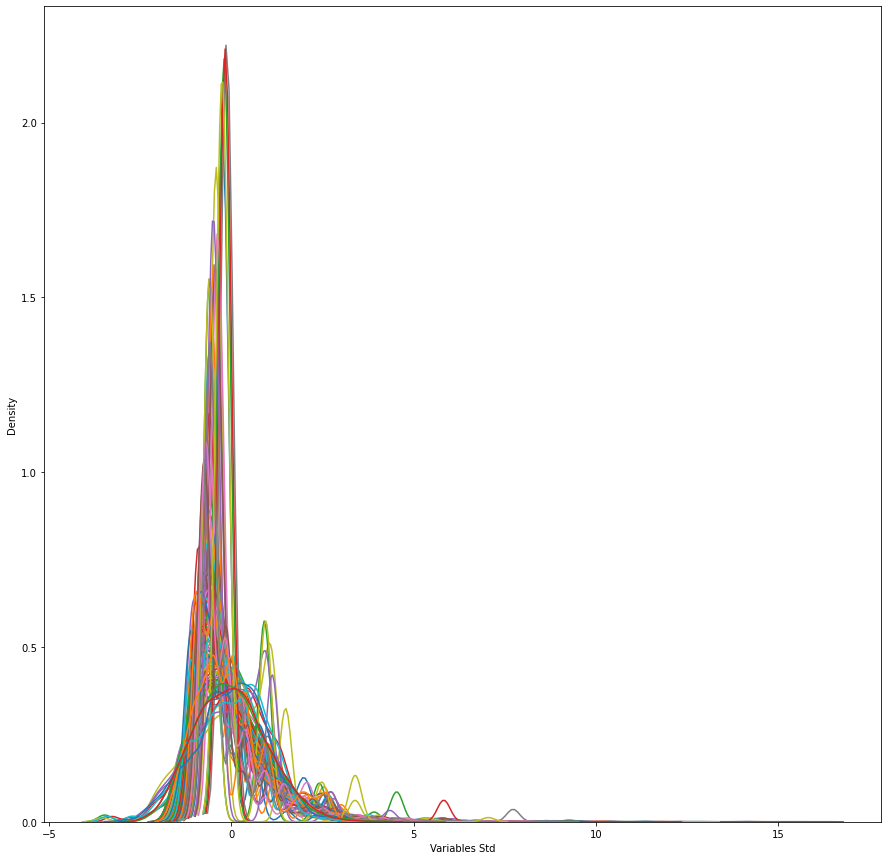

In [14]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(15,15))

for column in ufc_df_estandarized:
    sns.kdeplot(ufc_df_estandarized[column])

plt.xlabel('Variables Std')

* Exercici 2.
Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

#### Un cop tenim normalitzades les dades en l'exercici anterior, podem passar a analitzar per components PCA.

In [15]:
pca = PCA(2)  # project from 134 to 2 dimensions
ufc_pcas = pca.fit_transform(ufc_df_estandarized.notna())
print(ufc_df_estandarized.shape)
print(ufc_pcas.shape)

(6012, 134)
(6012, 2)


In [16]:
ufc_pcas

array([[-1.86165698, -0.05031286],
       [-1.86165698, -0.05031286],
       [ 4.47627569, -3.01271253],
       ...,
       [ 7.50335061,  3.35716983],
       [ 7.50031478,  3.3559028 ],
       [ 7.49394852,  3.35476047]])

In [17]:
# Convertim el array en dataframe per despres poder concatenar amb el nostre Target
principalDf = pd.DataFrame(data = ufc_pcas
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
# Concatenem la pca 2 dimensions amb el target, en el nostre cas, el guanyador
final_pcas = pd.concat([principalDf,ufc_df[['Winner']]], axis=1)

In [19]:
final_pcas.head()

,principal component 1,principal component 2,Winner
0,-1.861657,-0.050313,Red
1,-1.861657,-0.050313,Red
2,4.476276,-3.012713,Red
3,7.432004,3.328320,Blue
4,-1.861657,-0.050313,Blue


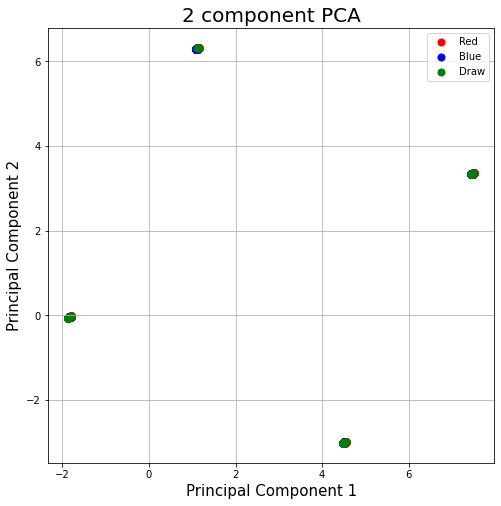

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Red', 'Blue','Draw']
colors = ['r', 'b','g']
for target, color in zip(targets,colors):
    indicesToKeep = final_pcas['Winner'] == target
    ax.scatter(final_pcas.loc[indicesToKeep, 'principal component 1']
               , final_pcas.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [21]:
pca.n_components_

2

In [22]:
pca.explained_variance_ratio_

array([0.69838583, 0.28675598])

El component 1 conte el 69% de la variança i el component 2 el 28%. Amb el agrupament d'atributs només s'ha perdut un 3% de variança.

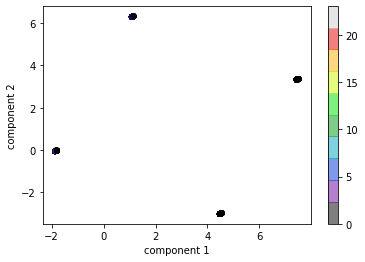

In [24]:
# Comprovem que amb l'atribut B_Wins obtenim un resultat similar
plt.scatter(ufc_pcas[:, 0], ufc_pcas[:, 1], c=ufc_df['B_wins'], edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

* Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

* Fem una primera exploració de dades per detectar outliers.

In [25]:
columns = ['B_Height_cms','B_Reach_cms','B_Weight_lbs','B_total_time_fought(seconds)','R_total_rounds_fought','B_wins','R_current_win_streak','R_current_lose_streak','B_age']

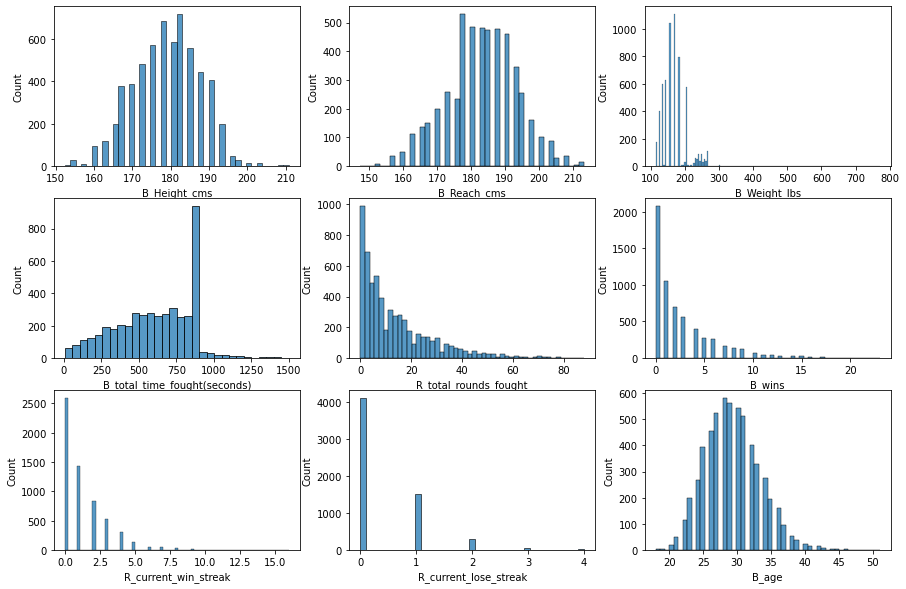

In [26]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

count = 0

for i in range(0, 3):
    sns.histplot(ufc_df[columns].iloc[:, count], ax=axs[i, 0])
    count += 1
    sns.histplot(ufc_df[columns].iloc[:, count], ax=axs[i, 1])
    count += 1
    sns.histplot(ufc_df[columns].iloc[:, count], ax=axs[i, 2])
    count += 1

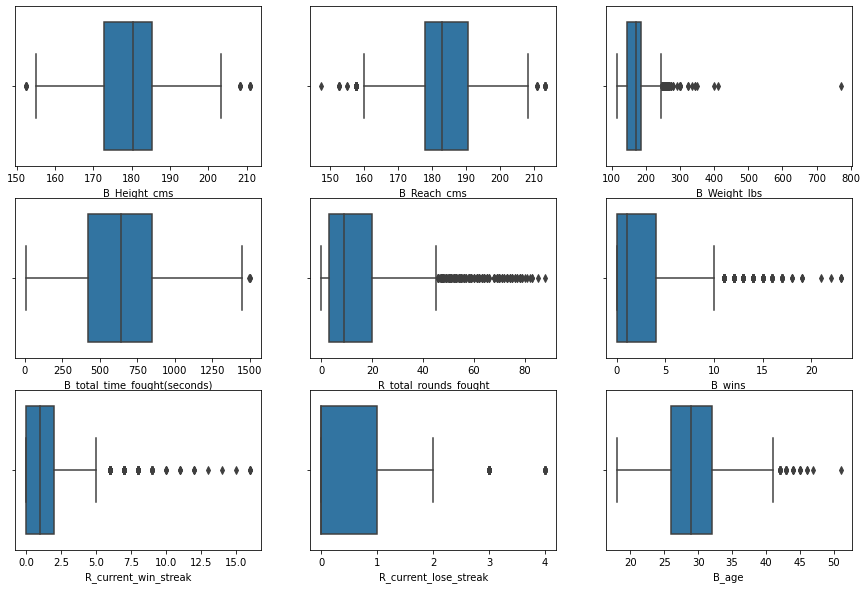

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

count = 0

for i in range(0, 3):
    sns.boxplot(x=ufc_df[columns].iloc[:, count], ax=axs[i, 0])
    count += 1
    sns.boxplot(x=ufc_df[columns].iloc[:, count], ax=axs[i, 1])
    count += 1
    sns.boxplot(x=ufc_df[columns].iloc[:, count], ax=axs[i, 2])
    count += 1

In [28]:
# Detectem possibles outliers a la Columna B_Weight_lbs & B_Age

In [29]:
my_first_outlier = ufc_df[(ufc_df['B_Weight_lbs'] > 500)]
my_first_outlier['B_Weight_lbs']

5996    770.0
Name: B_Weight_lbs, dtype: float64

In [30]:
my_first_outlier['B_fighter']

5996    Emmanuel Yarborough
Name: B_fighter, dtype: object

Tot i que el pes del lluitador és correcte ja que es tracta d'un lluitador de Sumo, decidim ometre aquest lluitador perque es l'unic provinent d'aquesta disciplina i amb un pes fora de la mitja i ens pot incrementar errors en la variança, decrementar la normalitat i afectar a les regressions.

https://en.wikipedia.org/wiki/Emmanuel_Yarbrough

In [31]:
ufc_df = ufc_df.drop(5996)

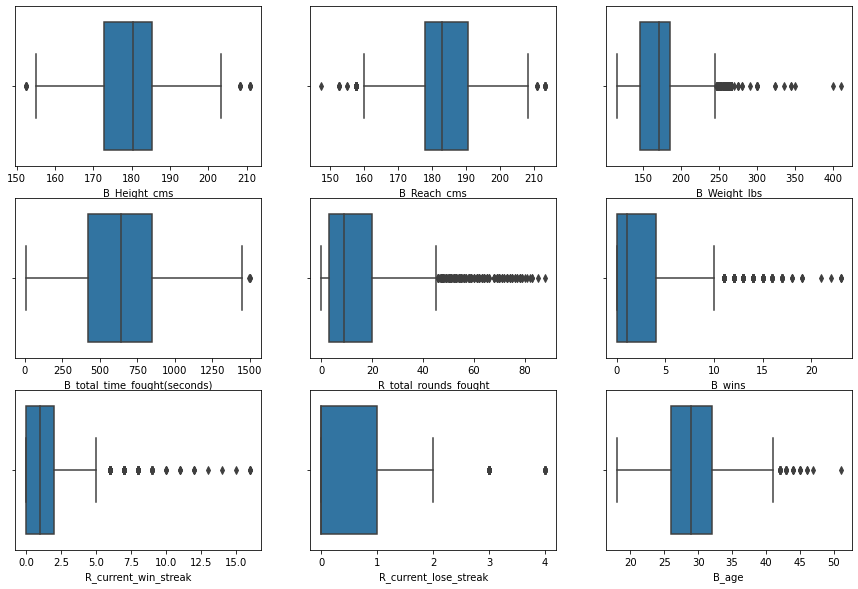

In [32]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

count = 0

for i in range(0, 3):
    sns.boxplot(x=ufc_df[columns].iloc[:, count], ax=axs[i, 0])
    count += 1
    sns.boxplot(x=ufc_df[columns].iloc[:, count], ax=axs[i, 1])
    count += 1
    sns.boxplot(x=ufc_df[columns].iloc[:, count], ax=axs[i, 2])
    count += 1

Veiem com ha cambiat la grafica del pes.

Continum amb la edat.

In [33]:
my_2nd_outlier = ufc_df[(ufc_df['B_age'] > 50)]
my_2nd_outlier['B_age']

5986    51.0
Name: B_age, dtype: float64

In [34]:
my_2nd_outlier['B_fighter']

5986    Ron van Clief
Name: B_fighter, dtype: object

Tot i que la edat també es correcte al tractar-se d'un lluitador senior, decidim ometre el lluitador pels pocs combats que va realitzar en la seva etapa profesional.

https://en.wikipedia.org/wiki/Ron_van_Clief

In [35]:
ufc_df = ufc_df.drop(5986)

In [36]:
# Actualitzem grafiques

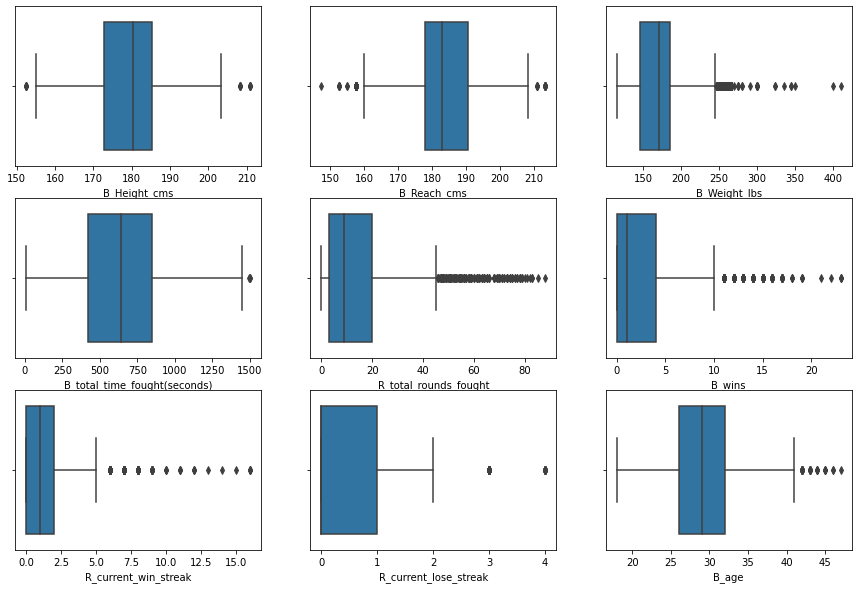

In [37]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

count = 0

for i in range(0, 3):
    sns.boxplot(x=ufc_df[columns].iloc[:, count], ax=axs[i, 0])
    count += 1
    sns.boxplot(x=ufc_df[columns].iloc[:, count], ax=axs[i, 1])
    count += 1
    sns.boxplot(x=ufc_df[columns].iloc[:, count], ax=axs[i, 2])
    count += 1

Veiem que la grafica boxplot per edat ara s'ha actualitzat.

Ara podem procedir a normalitzar el dataset.

In [38]:
ufc_norm = scaler.fit_transform(ufc_df[columns])
ufc_norm_df = pd.DataFrame(data=ufc_norm, columns=columns)

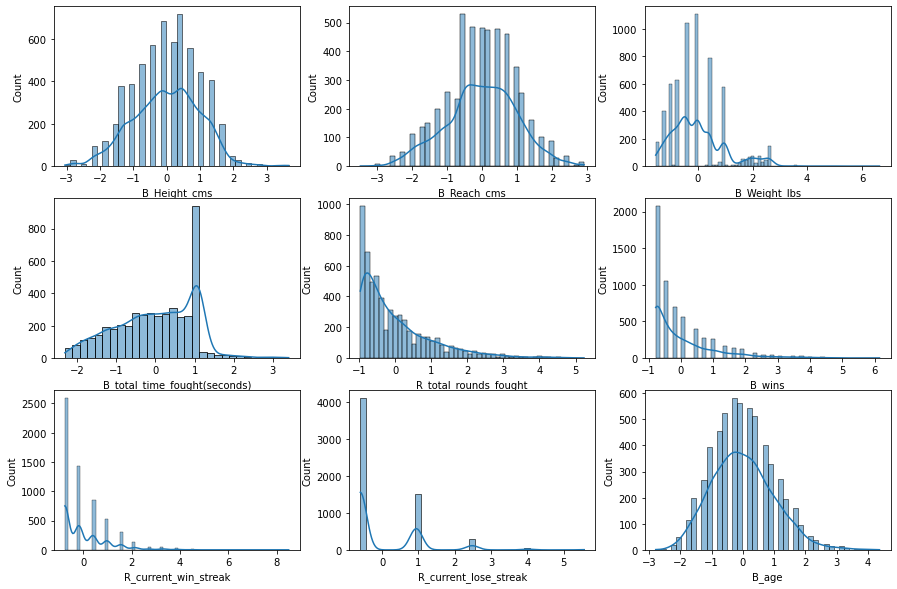

In [39]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

count = 0

for i in range(0, 3):
    sns.histplot(ufc_norm_df.iloc[:, count], ax=axs[i, 0], kde=True)
    count += 1
    sns.histplot(ufc_norm_df.iloc[:, count], ax=axs[i, 1], kde=True)
    count += 1
    sns.histplot(ufc_norm_df.iloc[:, count], ax=axs[i, 2], kde=True)
    count += 1